#### This notebook is for exploratory data analysis. 
Trying to gain insights from the data. NO machine learning model will be applied on this dataset.

We will try to see if the police brutality in USA is biased towards the black community or not

In [200]:
import os
os.chdir('D:/Sohum/')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [139]:
df = pd.read_csv('shootings.csv')

In [140]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


We will try to pick up each feature and try to gain insights from it.

In [141]:
col_to_drop = ['id','name']
df = df.drop(col_to_drop,axis=1)

In [142]:
df.isna().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

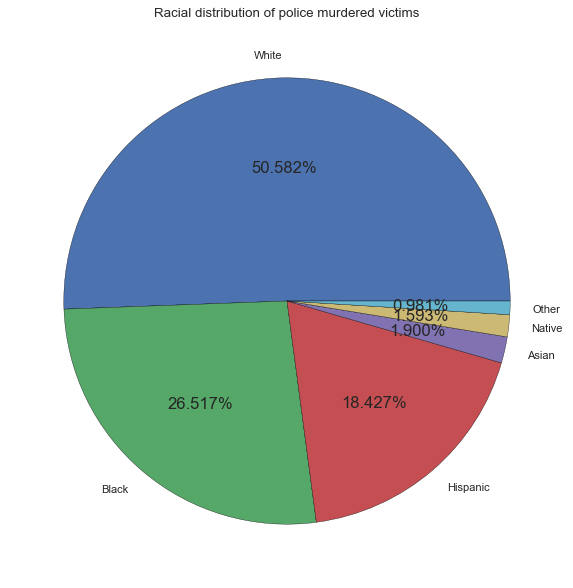

In [181]:
labels1 = ['White','Black','Hispanic','Asian','Native','Other'] 
fig = plt.figure(figsize=(9,9))
plt.pie(df.race.value_counts(),labels = labels1,autopct = '%1.3f%%')
plt.title("Racial distribution of police murdered victims")
plt.show()

In [178]:
df.race.value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

Almost 27% victims of all police shootings belong to the black community. It seems the USA police finds it easier to shoot non residents.

In [145]:
df['year']=" "
for i in range(len(df.date)):
    op = int(df.date[i].split('-')[0])
    df['year'][i] = op

In [146]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


### Finding number of shootings over the year

In [147]:
num_death_per_year = []
for i in np.unique(df.year):
    op = df[df.year == i]
    num = op.shape[0]
    num_death_per_year.append(num)

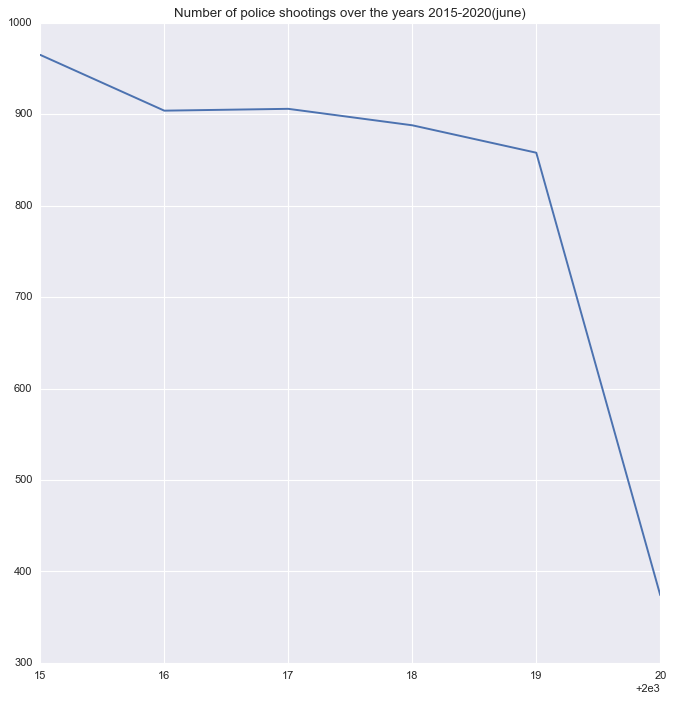

In [174]:
fig = plt.figure(figsize = (10,10))
sns.lineplot(x=np.unique(df.year),y=num_death_per_year)
plt.title("Number of police shootings over the years 2015-2020(june)")
plt.show()

We only have data upto 15th June of 2020, but it can be seen that for the years between 2015-2019 the police shootings are showing a negative pattern.

### Finding Type of shootings

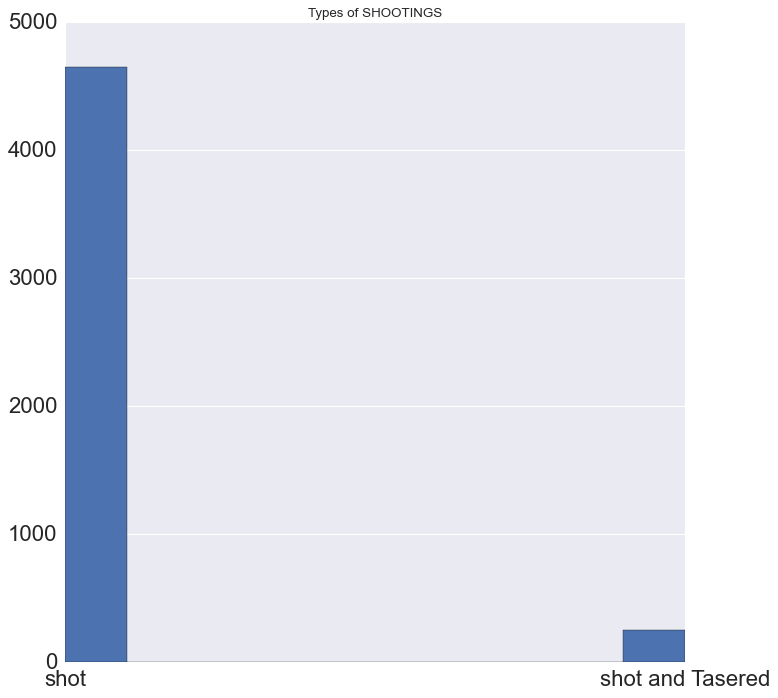

In [171]:
fig = plt.figure(figsize = (10,10))
plt.hist(df.manner_of_death,bins=10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)     
plt.title("Types of SHOOTINGS")
plt.show()

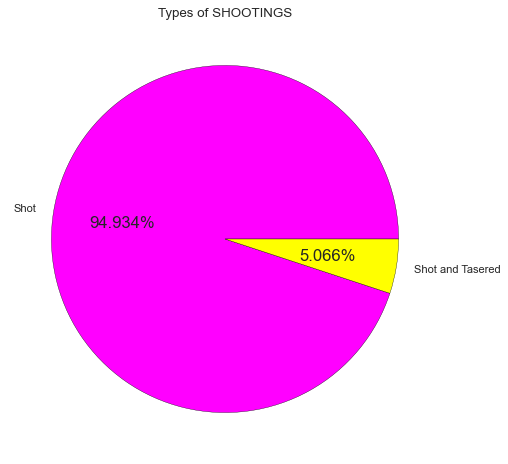

In [172]:
labels = ['Shot','Shot and Tasered']
am = []
og = df[df.manner_of_death == 'shot']
am.append(og.shape[0])
am.append(df.shape[0]-am[0])
color = ['magenta','yellow']
fig = plt.figure(figsize=(7,7))
plt.pie(am,labels = labels,colors = color,autopct = '%1.3f%%')
plt.title("Types of SHOOTINGS")
plt.show()

It is hard to imagine that a person had to be shot even after being tasered. The whole point of using a taser is to neutralise a person.

###### What is the constitution different races of shot and tasered victims ?

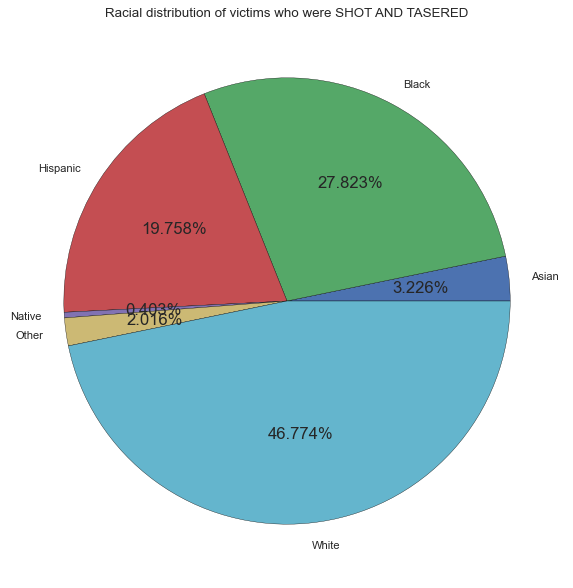

In [170]:
labels2 = np.unique(df.race)
am2 = []
for i in labels2:
    og = df[df.manner_of_death == 'shot and Tasered']
    og = og[og.race == i]
    am2.append(og.shape[0])  
fig = plt.figure(figsize=(9 ,9))
plt.pie(am2,labels = labels2,autopct = '%1.3f%%')
plt.title("Racial distribution of victims who were SHOT AND TASERED")
plt.show()

Almost 28% of all the victims who were shot as well as tasered belonged to the black community. SHOCKING!

### If the victim was armed or not

Let us first look at the different lists of weapons that all the victims were carrying

In [152]:
print(np.unique(df.armed))

['BB gun' 'BB gun and vehicle' 'Taser' 'air conditioner' 'air pistol' 'ax'
 'barstool' 'baseball bat' 'baseball bat and bottle'
 'baseball bat and fireplace poker' 'baseball bat and knife' 'baton'
 'bayonet' 'bean-bag gun' 'beer bottle' 'blunt object' 'bow and arrow'
 'box cutter' 'brick' 'car, knife and mace' 'carjack' 'chain' 'chain saw'
 'chainsaw' 'chair' "contractor's level" 'cordless drill' 'crossbow'
 'crowbar' 'fireworks' 'flagpole' 'flashlight' 'garden tool' 'glass shard'
 'grenade' 'gun' 'gun and car' 'gun and knife' 'gun and sword'
 'gun and vehicle' 'guns and explosives' 'hammer' 'hand torch' 'hatchet'
 'hatchet and gun' 'ice pick' 'incendiary device' 'knife'
 'lawn mower blade' 'machete' 'machete and gun' 'meat cleaver'
 'metal hand tool' 'metal object' 'metal pipe' 'metal pole' 'metal rake'
 'metal stick' 'motorcycle' 'nail gun' 'oar' 'pellet gun' 'pen'
 'pepper spray' 'pick-axe' 'piece of wood' 'pipe' 'pitchfork' 'pole'
 'pole and knife' 'rock' 'samurai sword' 'scissors'

Woah! This list sure is long. The US Police Department have done a pretty good job of putting almost every possible weapon known to me on that list.
But I am curious as to what weapon was the victim carrying that the police had to declare it as unknown.
Let us find out how many people were unarmed when killed.

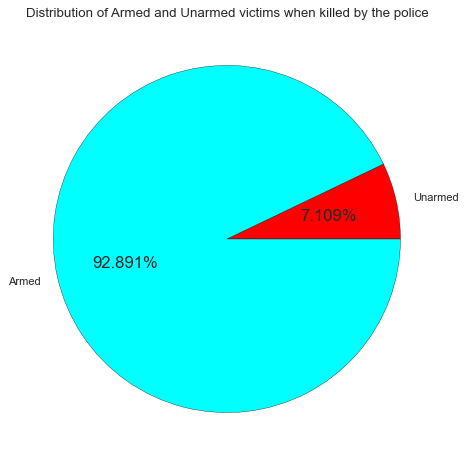

In [169]:
label = ['Unarmed','Armed']
amt = []
op = df[df.armed == 'unarmed']
amt.append(op.shape[0])
amt.append(df.shape[0]-amt[0])
colors = ['red','cyan']
fig = plt.figure(figsize=(7,7))
plt.pie(amt,labels=label,autopct='%1.3f%%',colors = colors)
plt.title("Distribution of Armed and Unarmed victims when killed by the police")
plt.show()

In 7% of the total police shootings after 2015, the victim was unarmed. Hard to imagine that these shootings involving unarmed victims could not have been prevented.

Let us look at the racial distribution of victims who were unarmed when shot


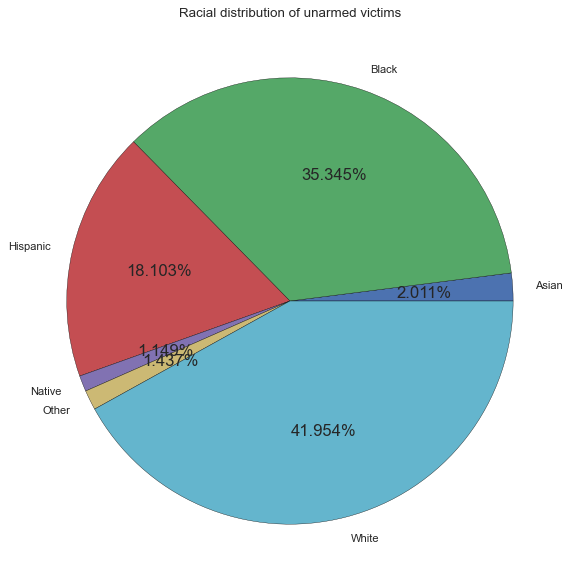

In [168]:
labels2 = np.unique(df.race)
am3 = []
for i in labels2:
    og = df[df.armed == 'unarmed']
    og = og[og.race == i]
    am3.append(og.shape[0])  
fig = plt.figure(figsize=(9,9))
plt.pie(am3,labels = labels2,autopct = '%1.3f%%')
plt.title("Racial distribution of unarmed victims")
plt.show()

A whooping 35% of unarmed victims belonged to the black community.

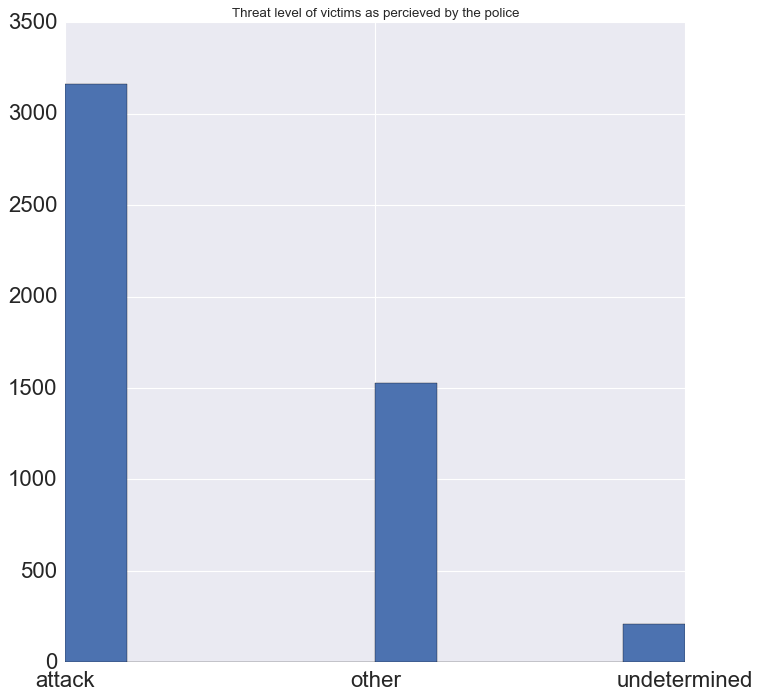

In [165]:
fig = plt.figure(figsize=(10,10))
plt.hist(df.threat_level)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Threat level of victims as percieved by the police")
plt.show()

Undetermined threat level is a pretty vague description.

###### Let us check the age distribution of victims

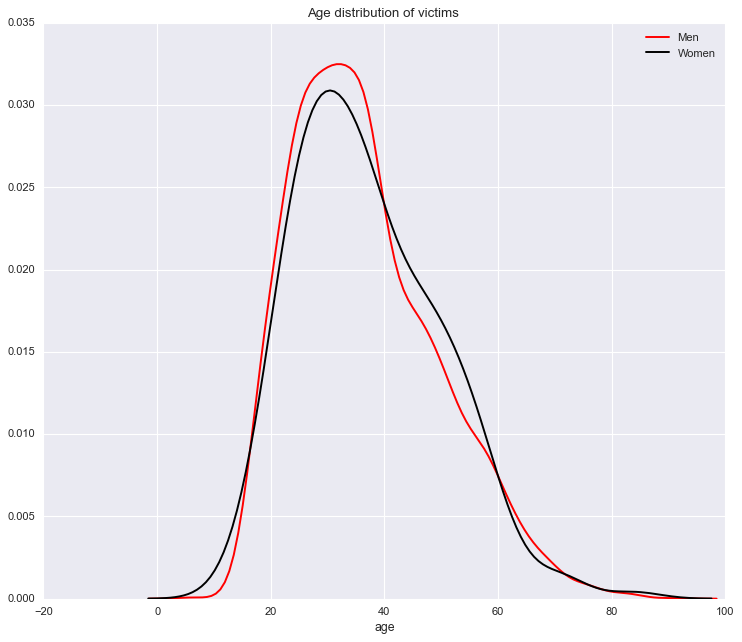

In [163]:
fig = plt.figure(figsize=(11,9))

male = df[df.gender == 'M'].age
female = df[df.gender == 'F'].age
sns.distplot(male,hist = False,color='red',label = "Men")
sns.distplot(female,hist = False, color = 'black',label = "Women")
plt.title('Age distribution of victims ')
plt.legend()
plt.show()

In [182]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015


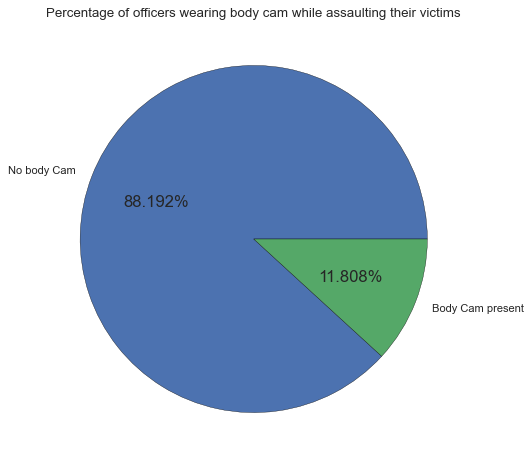

In [187]:
lab = ["No body Cam","Body Cam present"]
ax = [4317,578]
fig = plt.figure(figsize=(7,7))
plt.pie(ax,labels = lab,autopct = '%1.3f%%')
plt.title("Percentage of officers wearing body cam while assaulting their victims")
plt.show()

# IRONIC

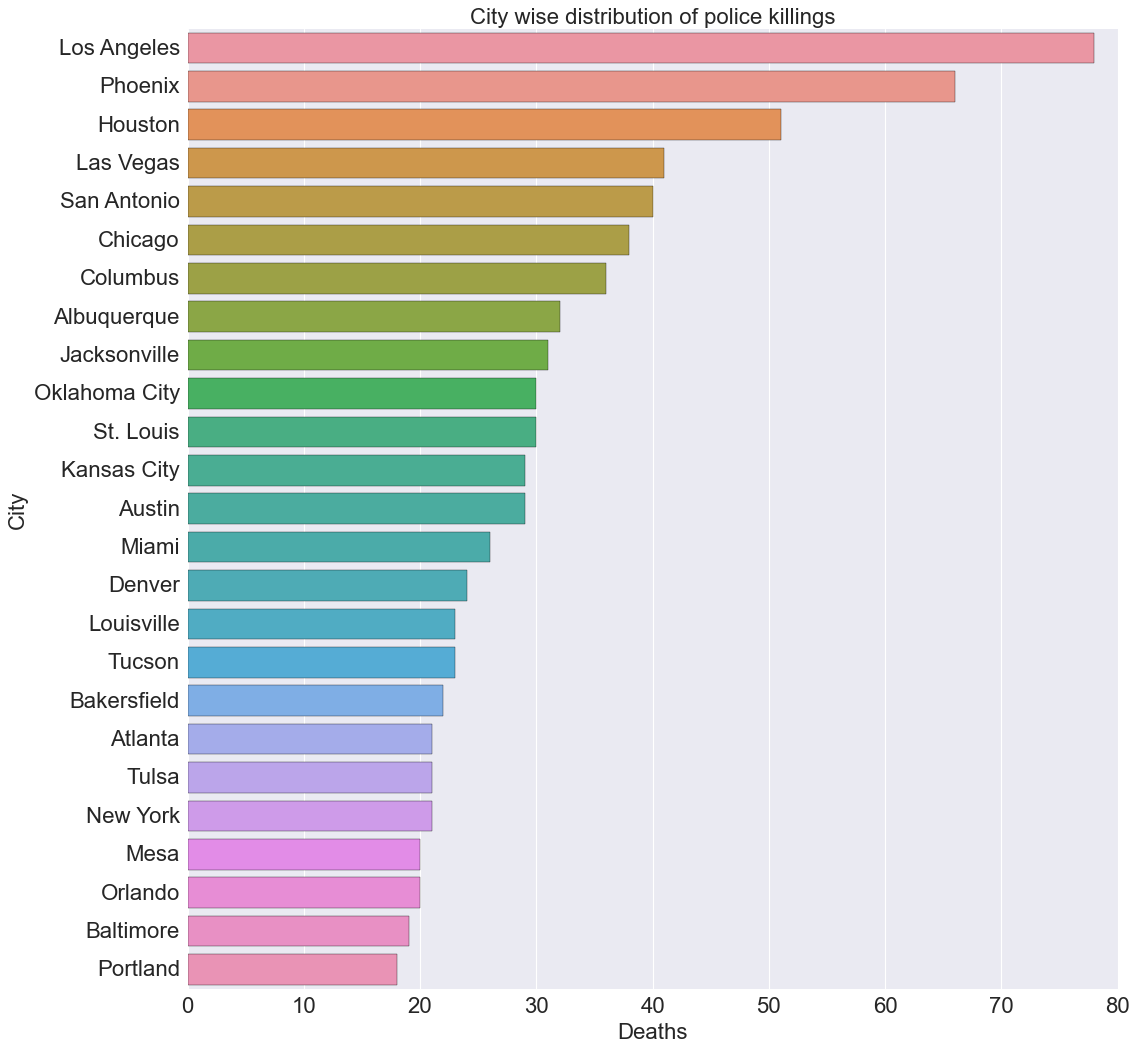

In [199]:
data = df.city.value_counts().reset_index().rename(columns={
    'index':'city',
    'city' : 'deaths'
}).head(25)
fig = plt.figure(figsize=(15,15))
sns.barplot(x = 'deaths',y = 'city',data=data)
plt.title("City wise distribution of police killings",fontsize=20)
plt.xlabel("Deaths",fontsize=20)
plt.ylabel("City",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

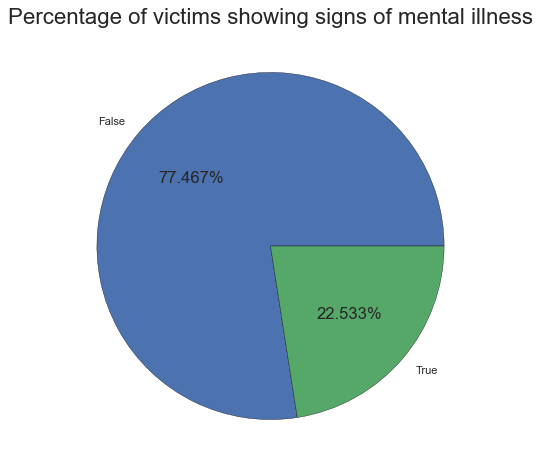

In [206]:
dat1 = df.signs_of_mental_illness.value_counts().reset_index().rename(columns={
    'index': 'ill_or_not',
    'signs_of_mental_illness':'number'
})

fig = plt.figure(figsize=(7,7))
plt.pie(dat1.number,labels = dat1.ill_or_not,autopct = '%1.3f%%')
plt.title("Percentage of victims showing signs of mental illness",fontsize=20)
plt.show()

In [210]:
black_state=df[df['race']=='Black']['state'].value_counts().to_frame().reset_index().rename(
    columns={'index':'state','state':'count'})

In [217]:
fig = go.Figure(go.Choropleth(
    locations=black_state['state'],
    z=black_state['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=black_state['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD",showscale = False,
))
fig.update_layout(
    title_text='US Police shooting cases of black people',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'))
fig.update_layout(
    template="presentation")
fig.show()

In [213]:
fig.update_layout?